In [50]:
import tensorflow.keras as keras
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# .reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2623 - acc: 0.9227
Epoch 2/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1062 - acc: 0.9669
Epoch 3/3
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0733 - acc: 0.9761


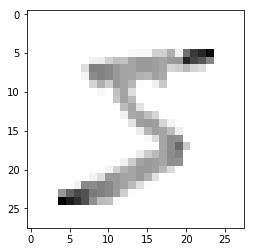

In [52]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [53]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0913 - acc: 0.9733
0.09125410844953731 0.9733


In [54]:
model.save('num_reader.model')

In [55]:
new_model = tf.keras.models.load_model('num_reader.model')

In [56]:
predictions = new_model.predict(x_test)

In [57]:
import numpy as np

print(np.argmax(predictions[0]))

7


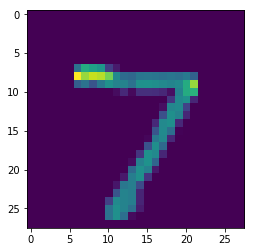

In [58]:
plt.imshow(x_test[0])
plt.show()

In [59]:
print(np.argmax(predictions[1]))

2


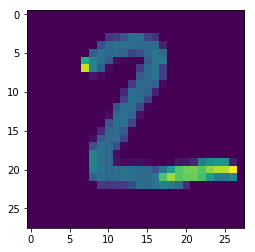

In [60]:
plt.imshow(x_test[1])
plt.show()